In [2]:
#Importing the modules needed for the follwing script
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
from sklearn import metrics

In [3]:
df = pd.read_csv("final_cleaned_data1.csv")

In [7]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90339 entries, 0 to 90338
Data columns (total 95 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ts                                   90337 non-null  float64
 1   id.orig_p                            90337 non-null  float64
 2   id.resp_p                            90337 non-null  float64
 3   duration                             37865 non-null  float64
 4   orig_bytes                           37865 non-null  float64
 5   resp_bytes                           37865 non-null  float64
 6   missed_bytes                         90337 non-null  float64
 7   orig_pkts                            90337 non-null  float64
 8   orig_ip_bytes                        90337 non-null  float64
 9   resp_pkts                            90337 non-null  float64
 10  resp_ip_bytes                        90337 non-null  float64
 11  label                       

In [9]:
# for whole dataframe
df = df.replace(np.nan, 0)
df.describe()

ts     id.orig_p     id.resp_p       duration    orig_bytes  \
count  9.033900e+04  90339.000000  90339.000000   90339.000000  9.033900e+04   
mean   1.687052e+09  35498.479771   4644.209854      20.694997  9.515182e+04   
std    7.977752e+06  22584.452919  11093.230133    1613.440155  9.646353e+06   
min    0.000000e+00      0.000000      0.000000       0.000000  0.000000e+00   
25%    1.686768e+09   5353.000000    123.000000       0.000000  0.000000e+00   
50%    1.686859e+09  43583.000000    443.000000       0.000000  0.000000e+00   
75%    1.687349e+09  53533.000000   5353.000000       0.002609  4.600000e+01   
max    1.688525e+09  65528.000000  65503.000000  177303.707800  1.480593e+09   

         resp_bytes  missed_bytes      orig_pkts  orig_ip_bytes  \
count  9.033900e+04  9.033900e+04   90339.000000   9.033900e+04   
mean   1.090340e+05  4.722752e+04      19.965973   6.653289e+03   
std    1.086254e+07  6.929920e+06    1287.087551   5.761053e+05   
min    0.000000e+00  0.000000e+00       0.000000   0.000000e+00   
25%    0.000000e+00  0.000000e+00       0.000000   0.000000e+00   
50%    0.000000e+00  0.000000e+00       1.000000   7.600000e+01   
75%    0.000000e+00  0.000000e+00       1.000000   1.360000e+02   
max    1.695134e+09  1.154645e+09  130042.000000   6.399249e+07   

           resp_pkts  ...  conn_state_RSTR  conn_state_RSTRH  conn_state_S0  \
count   90339.000000  ...     90339.000000      90339.000000   90339.000000   
mean       12.163362  ...         0.004915          0.000365       0.430512   
std      1014.987629  ...         0.069934          0.019109       0.495151   
min         0.000000  ...         0.000000          0.000000       0.000000   
25%         0.000000  ...         0.000000          0.000000       0.000000   
50%         0.000000  ...         0.000000          0.000000       0.000000   
75%         0.000000  ...         0.000000          0.000000       1.000000   
max    211204.000000  ...         1.000000          1.000000       1.000000   

       conn_state_S1  conn_state_S2  conn_state_S3  conn_state_SF  \
count   90339.000000   90339.000000   90339.000000   90339.000000   
mean        0.000753       0.000299       0.000874       0.078250   
std         0.027426       0.017285       0.029559       0.268566   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       conn_state_SH  conn_state_SHR  conn_state_resp_bytes  
count   90339.000000    90339.000000           90339.000000  
mean        0.002103        0.036263               0.000022  
std         0.045813        0.186946               0.004705  
min         0.000000        0.000000               0.000000  
25%         0.000000        0.000000               0.000000  
50%         0.000000        0.000000               0.000000  
75%         0.000000        0.000000               0.000000  
max         1.000000        1.000000               1.000000  

[8 rows x 95 columns]

# Apply Clamping¶


In [10]:
# Clamp extreme Values
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe(include='all')

ts     id.orig_p     id.resp_p       duration    orig_bytes  \
count  9.033900e+04  90339.000000  90339.000000   90339.000000  9.033900e+04   
mean   1.687052e+09  35498.479771   4644.209854      20.694997  9.515182e+04   
std    7.977752e+06  22584.452919  11093.230133    1613.440155  9.646353e+06   
min    0.000000e+00      0.000000      0.000000       0.000000  0.000000e+00   
25%    1.686768e+09   5353.000000    123.000000       0.000000  0.000000e+00   
50%    1.686859e+09  43583.000000    443.000000       0.000000  0.000000e+00   
75%    1.687349e+09  53533.000000   5353.000000       0.002609  4.600000e+01   
max    1.688525e+09  65528.000000  65503.000000  177303.707800  1.480593e+09   

         resp_bytes  missed_bytes      orig_pkts  orig_ip_bytes  \
count  9.033900e+04  9.033900e+04   90339.000000   9.033900e+04   
mean   1.090340e+05  4.722752e+04      19.965973   6.653289e+03   
std    1.086254e+07  6.929920e+06    1287.087551   5.761053e+05   
min    0.000000e+00  0.000000e+00       0.000000   0.000000e+00   
25%    0.000000e+00  0.000000e+00       0.000000   0.000000e+00   
50%    0.000000e+00  0.000000e+00       1.000000   7.600000e+01   
75%    0.000000e+00  0.000000e+00       1.000000   1.360000e+02   
max    1.695134e+09  1.154645e+09  130042.000000   6.399249e+07   

           resp_pkts  ...  conn_state_RSTR  conn_state_RSTRH  conn_state_S0  \
count   90339.000000  ...     90339.000000      90339.000000   90339.000000   
mean       12.163362  ...         0.004915          0.000365       0.430512   
std      1014.987629  ...         0.069934          0.019109       0.495151   
min         0.000000  ...         0.000000          0.000000       0.000000   
25%         0.000000  ...         0.000000          0.000000       0.000000   
50%         0.000000  ...         0.000000          0.000000       0.000000   
75%         0.000000  ...         0.000000          0.000000       1.000000   
max    211204.000000  ...         1.000000          1.000000       1.000000   

       conn_state_S1  conn_state_S2  conn_state_S3  conn_state_SF  \
count   90339.000000   90339.000000   90339.000000   90339.000000   
mean        0.000753       0.000299       0.000874       0.078250   
std         0.027426       0.017285       0.029559       0.268566   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       conn_state_SH  conn_state_SHR  conn_state_resp_bytes  
count   90339.000000    90339.000000           90339.000000  
mean        0.002103        0.036263               0.000022  
std         0.045813        0.186946               0.004705  
min         0.000000        0.000000               0.000000  
25%         0.000000        0.000000               0.000000  
50%         0.000000        0.000000               0.000000  
75%         0.000000        0.000000               0.000000  
max         1.000000        1.000000               1.000000  

[8 rows x 95 columns]

In [11]:
DEBUG = 0

for feature in df_numeric.columns:
    if DEBUG == 1:
        print(feature)
        print('max = '+str(df_numeric[feature].max()))
        print('75th = '+str(df_numeric[feature].quantile(0.95)))
        print('median = '+str(df_numeric[feature].median()))
        print(df_numeric[feature].max()>10*df_numeric[feature].median())
        print('----------------------------------------------------')
    if df_numeric[feature].max()>10*df_numeric[feature].median() and df_numeric[feature].max()>10 :
        df[feature] = np.where(df[feature]<df[feature].quantile(0.95), df[feature], df[feature].quantile(0.95))

In [12]:
df.describe(include='all')

ts     id.orig_p     id.resp_p      duration    orig_bytes  \
count  9.033900e+04  90339.000000  90339.000000  90339.000000  90339.000000   
mean   1.687052e+09  35498.479771   3869.354963      0.524478    168.203113   
std    7.977752e+06  22584.452919   7725.195691      1.273706    389.204115   
min    0.000000e+00      0.000000      0.000000      0.000000      0.000000   
25%    1.686768e+09   5353.000000    123.000000      0.000000      0.000000   
50%    1.686859e+09  43583.000000    443.000000      0.000000      0.000000   
75%    1.687349e+09  53533.000000   5353.000000      0.002609     46.000000   
max    1.688525e+09  65528.000000  35156.000000      4.540826   1480.000000   

         resp_bytes  missed_bytes     orig_pkts  orig_ip_bytes     resp_pkts  \
count  90339.000000       90339.0  90339.000000   90339.000000  90339.000000   
mean      37.836239           0.0      1.804835     244.982776      0.441637   
std      120.317264           0.0      2.474524     425.706223      1.420777   
min        0.000000           0.0      0.000000       0.000000      0.000000   
25%        0.000000           0.0      0.000000       0.000000      0.000000   
50%        0.000000           0.0      1.000000      76.000000      0.000000   
75%        0.000000           0.0      1.000000     136.000000      0.000000   
max      506.000000           0.0     10.000000    1592.000000      6.000000   

       ...  conn_state_RSTR  conn_state_RSTRH  conn_state_S0  conn_state_S1  \
count  ...     90339.000000      90339.000000   90339.000000   90339.000000   
mean   ...         0.004915          0.000365       0.430512       0.000753   
std    ...         0.069934          0.019109       0.495151       0.027426   
min    ...         0.000000          0.000000       0.000000       0.000000   
25%    ...         0.000000          0.000000       0.000000       0.000000   
50%    ...         0.000000          0.000000       0.000000       0.000000   
75%    ...         0.000000          0.000000       1.000000       0.000000   
max    ...         1.000000          1.000000       1.000000       1.000000   

       conn_state_S2  conn_state_S3  conn_state_SF  conn_state_SH  \
count   90339.000000   90339.000000   90339.000000   90339.000000   
mean        0.000299       0.000874       0.078250       0.002103   
std         0.017285       0.029559       0.268566       0.045813   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       conn_state_SHR  conn_state_resp_bytes  
count    90339.000000           90339.000000  
mean         0.036263               0.000022  
std          0.186946               0.004705  
min          0.000000               0.000000  
25%          0.000000               0.000000  
50%          0.000000               0.000000  
75%          0.000000               0.000000  
max          1.000000               1.000000  

[8 rows x 95 columns]

In [13]:
df.drop(['ts'],axis=1,inplace=True)

In [14]:
df

id.orig_p  id.resp_p  duration  orig_bytes  resp_bytes  missed_bytes  \
0        34316.0     5353.0  0.000936        45.0         0.0           0.0   
1        38222.0     5353.0  0.000944        45.0         0.0           0.0   
2        60018.0     5353.0  0.000799        46.0         0.0           0.0   
3        57724.0     5353.0  0.001447        46.0         0.0           0.0   
4        43083.0     5353.0  0.002282        29.0         0.0           0.0   
...          ...        ...       ...         ...         ...           ...   
90334    57911.0      443.0  0.214845      1309.0       506.0           0.0   
90335    40018.0     1900.0  4.540826      1480.0         0.0           0.0   
90336    50826.0     1900.0  4.540826      1480.0         0.0           0.0   
90337    50826.0     1900.0  4.540826      1480.0         0.0           0.0   
90338    50826.0     1900.0  4.540826      1480.0         0.0           0.0   

       orig_pkts  orig_ip_bytes  resp_pkts  resp_ip_bytes  ...  \
0            1.0           73.0        0.0            0.0  ...   
1            1.0           93.0        0.0            0.0  ...   
2            1.0           74.0        0.0            0.0  ...   
3            1.0           94.0        0.0            0.0  ...   
4            1.0           57.0        0.0            0.0  ...   
...          ...            ...        ...            ...  ...   
90334       10.0         1592.0        6.0          757.0  ...   
90335       10.0         1592.0        0.0            0.0  ...   
90336       10.0         1592.0        0.0            0.0  ...   
90337       10.0         1592.0        0.0            0.0  ...   
90338       10.0         1592.0        0.0            0.0  ...   

       conn_state_RSTR  conn_state_RSTRH  conn_state_S0  conn_state_S1  \
0                    0                 0              1              0   
1                    0                 0              1              0   
2                    0                 0              1              0   
3                    0                 0              1              0   
4                    0                 0              1              0   
...                ...               ...            ...            ...   
90334                0                 0              0              1   
90335                0                 0              1              0   
90336                0                 0              1              0   
90337                0                 0              1              0   
90338                0                 0              1              0   

       conn_state_S2  conn_state_S3  conn_state_SF  conn_state_SH  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
90334              0              0              0              0   
90335              0              0              0              0   
90336              0              0              0              0   
90337              0              0              0              0   
90338              0              0              0              0   

       conn_state_SHR  conn_state_resp_bytes  
0                   0                      0  
1                   0                      0  
2                   0                      0  
3                   0                      0  
4                   0                      0  
...               ...                    ...  
90334               0                      0  
90335               0                      0  
90336               0                      0  
90337               0                      0  
90338               0         

# Decision Tree


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [16]:
X = df.copy()
Y = X.label
X = X.drop(["label"], axis=1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state = 100)

In [18]:
clf_entropy = DecisionTreeClassifier(criterion = "gini", random_state = 100, splitter = "random", max_depth = 10, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=100,
                       splitter='random')

In [19]:
y_pred_en = clf_entropy.predict(X_test)
prediction_df = pd.DataFrame()
prediction_df["y_pred_en"] = y_pred_en

In [20]:
print(("Accuracy is: "), accuracy_score(y_test, y_pred_en) * 100)

Accuracy is:  99.11109620287132


In [21]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred_en))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred_en))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred_en)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred_en) * 100)
print("Accuracy - ",accuracy_score(y_test,y_pred_en) * 100)

Mean Absolute Error -  0.00888903797128673
Mean Squared Error -  0.00888903797128673
Root Mean Squared Error -  0.09428169478369983
R2 Score -  96.34236309306513
Accuracy -  99.11109620287132


In [22]:
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12389
           1       0.99      0.99      0.99     17423

    accuracy                           0.99     29812
   macro avg       0.99      0.99      0.99     29812
weighted avg       0.99      0.99      0.99     29812



In [23]:
dt_multi_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_en})
dt_multi_df

Actual  Predicted
13715       1          1
39258       1          1
28943       1          1
81065       0          0
1872        1          1
...       ...        ...
35173       1          1
89928       0          0
56997       0          0
60870       0          0
52492       1          1

[29812 rows x 2 columns]

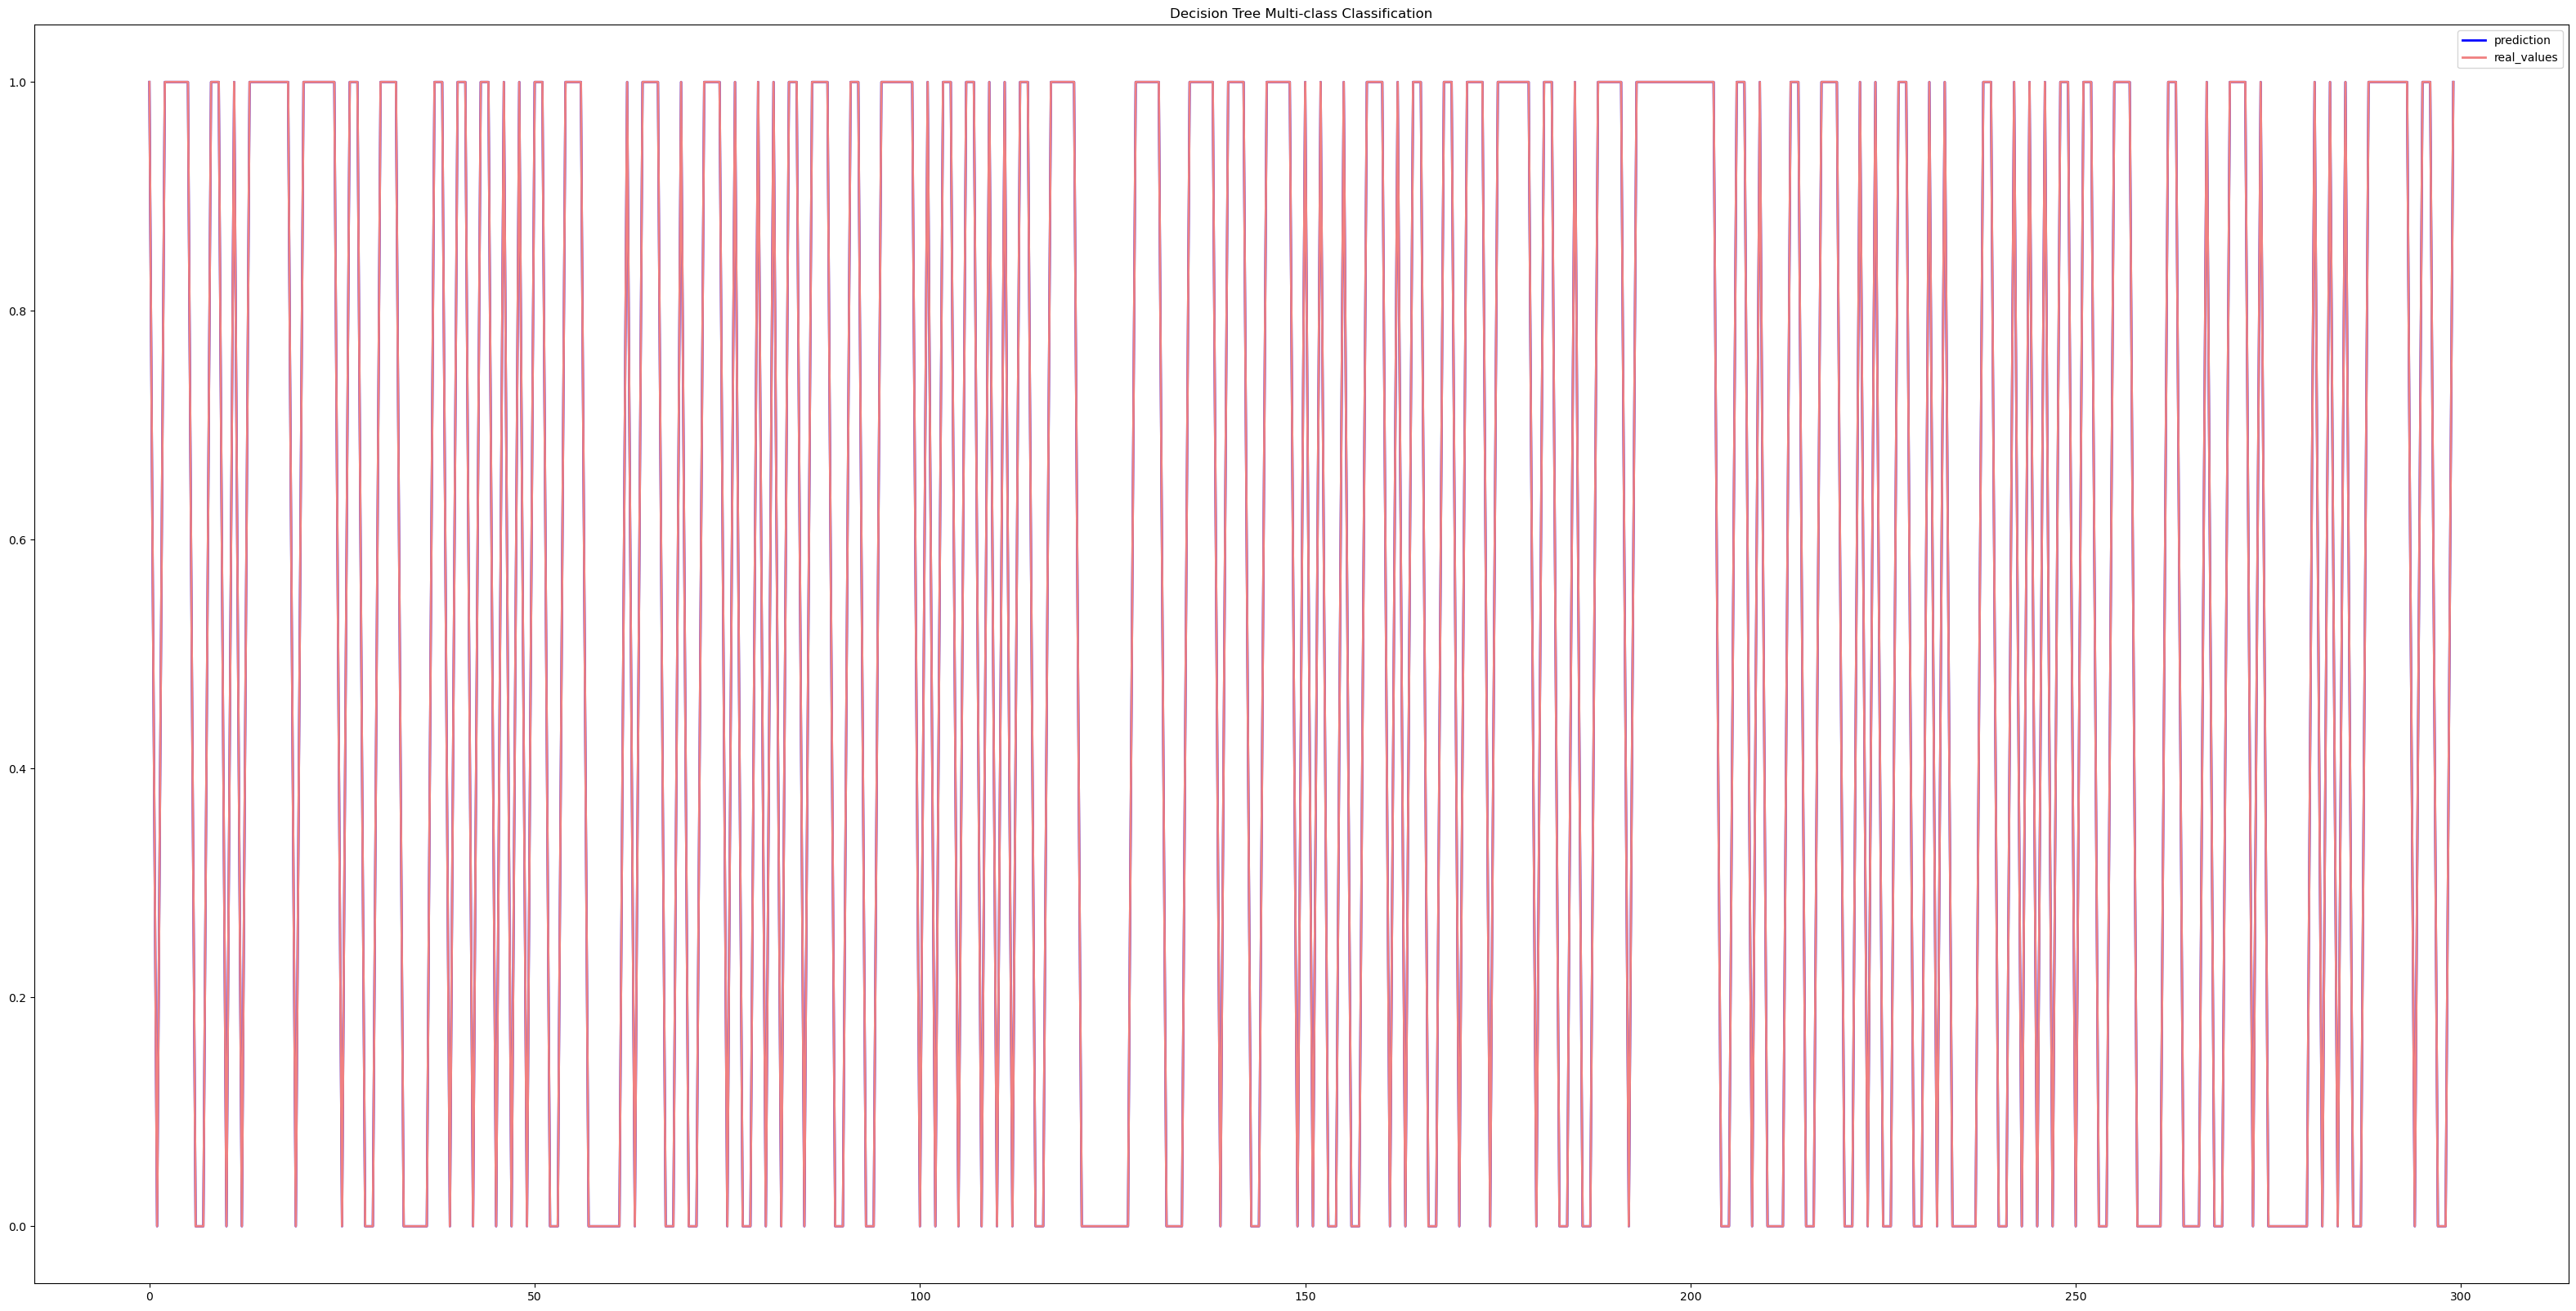

In [26]:
plt.figure(figsize=(40,20))
plt.plot(y_pred_en[400:700], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[400:700].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Decision Tree Multi-class Classification")
plt.savefig('dt_real_pred_multi.png')
plt.show()

In [27]:
confusion_en = metrics.confusion_matrix(y_test, y_pred_en)
confusion_en.ravel()

array([12292,    97,   168, 17255], dtype=int64)

# Trial 2 (Discussion on Feature Importance


In [28]:
importance = clf_entropy.feature_importances_

In [29]:
for feature, importance in zip(X_train.columns, clf_entropy.feature_importances_):
    print(feature, " : ", importance)

id.orig_p  :  0.3223420064743644
id.resp_p  :  0.08469987221051171
duration  :  0.012804510699426066
orig_bytes  :  0.11881717698761092
resp_bytes  :  0.0
missed_bytes  :  0.0
orig_pkts  :  1.3928173907918849e-05
orig_ip_bytes  :  0.0
resp_pkts  :  0.0
resp_ip_bytes  :  0.0
id.orig_h_169.254.215.19  :  0.0
id.orig_h_172.16.25.149  :  0.0
id.orig_h_172.16.25.183  :  0.004379671111438085
id.orig_h_172.19.4.247  :  0.0
id.orig_h_172.30.0.237  :  0.0
id.orig_h_172.30.0.246  :  0.0
id.orig_h_172.30.0.35  :  0.0
id.orig_h_172.30.0.53  :  0.0
id.orig_h_172.30.0.77  :  0.0
id.orig_h_172.30.0.90  :  0.0
id.orig_h_18.206.35.2  :  0.0
id.orig_h_192.168.0.1  :  0.0017293698664134832
id.orig_h_192.168.0.110  :  0.0
id.orig_h_192.168.0.116  :  0.0
id.orig_h_192.168.0.118  :  0.004838741323646812
id.orig_h_192.168.0.119  :  0.0
id.orig_h_192.168.0.130  :  0.0
id.orig_h_192.168.0.131  :  0.005471312209668102
id.orig_h_192.168.0.137  :  0.000950103198537672
id.orig_h_192.168.0.146  :  0.007252824189689

In [30]:
clf_RF = RandomForestClassifier(n_estimators = 100)

In [31]:
clf_RF.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
y_pred_RF = clf_RF.predict(X_test)

In [33]:
print(("Accuracy is: "), accuracy_score(y_test, y_pred_RF) * 100)

Accuracy is:  99.5370991547028


In [34]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred_RF))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred_RF))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred_RF) * 100)
print("Accuracy - ",accuracy_score(y_test,y_pred_RF) * 100)

Mean Absolute Error -  0.004629008452971957
Mean Squared Error -  0.004629008452971957
Root Mean Squared Error -  0.0680368168932965
R2 Score -  98.10212430745926
Accuracy -  99.5370991547028


In [35]:
cls_report_RF = classification_report(y_true=y_test, y_pred=y_pred_RF)
print(cls_report_RF)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     12389
           1       1.00      0.99      1.00     17423

    accuracy                           1.00     29812
   macro avg       0.99      1.00      1.00     29812
weighted avg       1.00      1.00      1.00     29812



In [36]:
rf_multi_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_RF})
rf_multi_df

Actual  Predicted
13715       1          1
39258       1          1
28943       1          1
81065       0          0
1872        1          1
...       ...        ...
35173       1          1
89928       0          0
56997       0          0
60870       0          0
52492       1          1

[29812 rows x 2 columns]

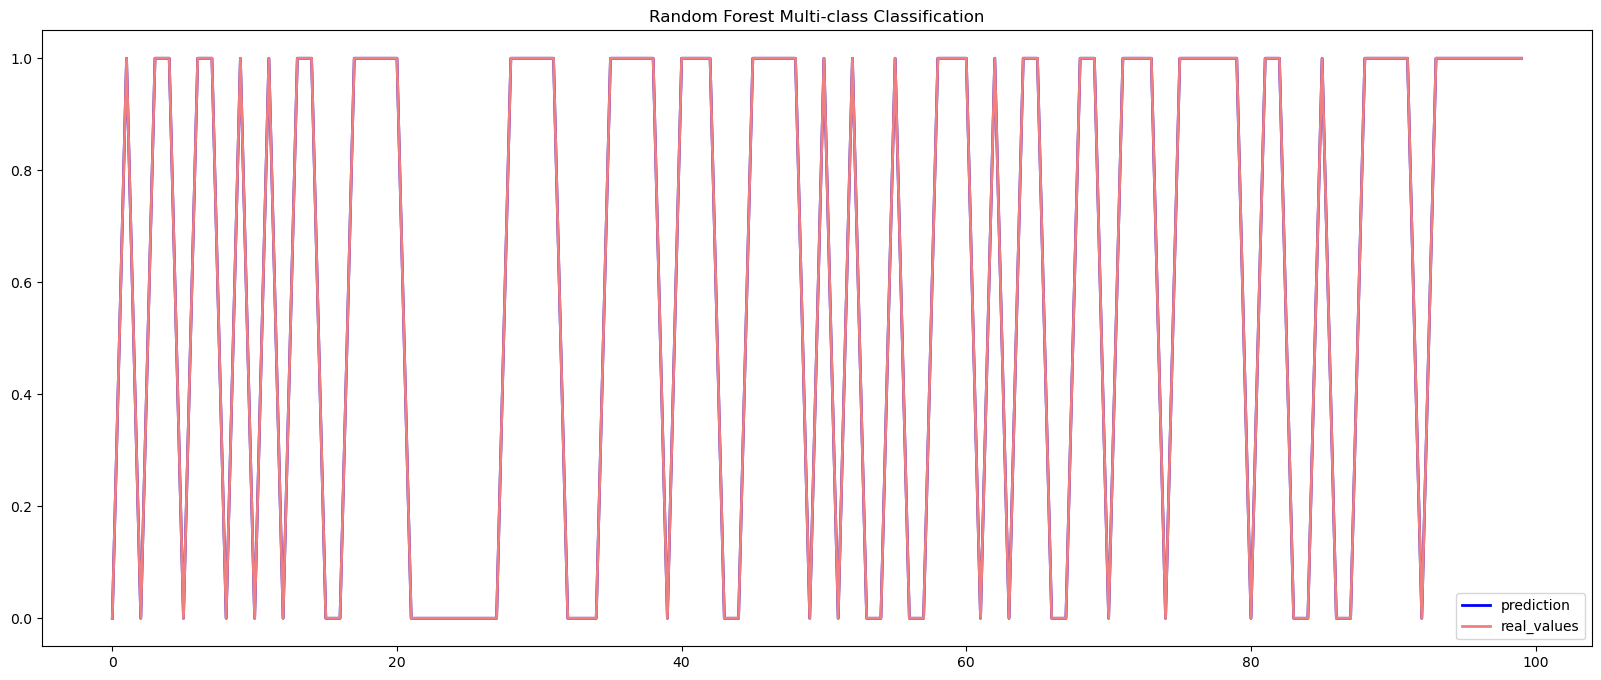

In [37]:
plt.figure(figsize=(20,8))
plt.plot(y_pred_RF[500:600], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[500:600].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Random Forest Multi-class Classification")
plt.savefig('rf_real_pred_multi.png')
plt.show()

In [40]:
df['label'].value_counts()

1    52606
0    37733
Name: label, dtype: int64

In [41]:
confusion_RF = metrics.confusion_matrix(y_test, y_pred_RF)
confusion_RF.ravel()


array([12386,     3,   135, 17288], dtype=int64)

In [1]:
!pip install --upgrade scikit-learn


In [ ]:
!pip uninstall scikit-learn
!pip install scikit-learn
